## TensorFlow

### Google's Open sourced Machine Learning system
- [Released Nov 09, 2015](http://googleresearch.blogspot.ca/2015/11/tensorflow-googles-latest-machine_9.html)
- Took the place of Google's ML infrastructure ${\bf DistBelief}$ 
    - Developed in 2011
    - Responsible for training deep learning NNs (Google Photos, Google Translate, [DeepDream](http://thenewstack.io/deep-learning-neural-networks-google-deep-dream/))
- second-generation system for the implementation and deployment of largescale machine learning models
- Has built-in support for deep learning algorithms
    - Other deep learning frameworks (Theano, Torch, Cafe, Neon, H20, ...)
- Or, any computation that can be expressed as computational flow graphs
- gradient-based machine learning algorithms
- Also, for other forms of ML algorithms - reinforcement learning, logistic regression.
- Provides both Python and C/C++ API to link into a developer program.
    - [The underlying software is built in C++](http://www.wired.com/2015/11/google-open-sources-its-artificial-intelligence-engine/)

### Why TensorFlow
- A single system on heterogenous platform  
    - executed on a wide range of devices
        - from single or multiple CPUs, to super-accelerated GPU environments
        - from mobile device platforms such as Android and iOS to distributed systems.
- flexibility and performance 
    - compared to DistBelief


- "A computation expressed using TensorFlow can be executed with little or no change on a wide variety of heterogeneous systems, ranging from mobile devices such as phones and tablets up to large-scale distributed systems of hundreds of machines and thousands of computational devices such as GPU cards." [See whitepaper](http://download.tensorflow.org/paper/whitepaper2015.pdf)

### Key: TensorFlow uses data flow graphs 

- computations are represented as stateful data flow graphs
    - Data flow graphs describe mathematical computation with a directed graph of nodes & edges
        - $\bf{Nodes}$ - represent mathematical operation $\bf{(ops)}$.
        - $\bf{Edges}$ - serves as $\bf{tensors}$ (multidimensional arrays) 
            - describe input/output relationships b/n nodes.
    - Data flow graphs delineates the computation that happens during
        - ${\bf Session}$
        <img src="TensorFlowGraphExample.png">

### Construct a computational graphs
    - Each node has zero or more inputs and zero or more out puts
        - represents the instantiation of operations
        -Examples of operations
            - Elementwise mathematical operation
                - Add, Sub, Mul, Exp, Log, Greater, Equal
            - Array operation
                - Constant, Rank, Shape, Split, Shuffle
            - Matrix operation
                - MatMul, MatrixInverse,MatrixDeterminant
            - Stateful Operation
                - Variable, Assign, AssignAdd
            - Neural-netbuilding blocks 
                - SoftMax, Sigmoid, Convolution2D
    -  Values that flow along normal edges in the graph are tensors

### Execute a TensorFlow graph
    - Client's program interact with TensorFlow system by creating a Session
        - Session.Run()
            - Takes an output name that need to be computed
            - Optional set of tensors to be fed into the graph
                - e.g., using feed_dict

### Variables
    - special kind of operation that returns a handle to a persistent mutable tensor that survives across executions of a graph
    
[mode detail from the whitepaper](http://download.tensorflow.org/paper/whitepaper2015.pdf)

<img src="TensorFlowGraph.png">
[Source](http://download.tensorflow.org/paper/whitepaper2015.pdf)

### Theano vs TensorFlow

Does this look Similar? [See Theano documentation](http://deeplearning.net/software/theano/tutorial/symbolic_graphs.html#theano-graphs)
- The first step in writing Theano code is to write down all mathematical relations using symbolic ${\bf placeholders (variables)}$

- When writing down these expressions you use operations like $+, -, **, sum(), tanh()$. All these are represented internally as ${\bf ops}$.

- Theano builds internally a graph structure composed of interconnected $\bf {variable}$ ${\bf nodes}$, ${\bf op}$ ${\bf nodes}$ and ${\bf apply}$ ${\bf nodes.}$ 

In [10]:
import theano.tensor as T
x = T.dmatrix('x')
y = T.dmatrix('y')
z = x + y

<img src="TheanoGraphExample.png">

In [1]:
from theano import tensor as T, function
x = T.dscalar('x')       # declare symbolic variable
y = T.dscalar('y')       # declare symbolic variable
z = x + y                # build symbolic expression

f = function([x, y], z)  # compile function
print f(10,32)           # prints 

42.0


### The jury is still out
- [Evaluation of Deep Learning Toolkits](https://github.com/zer0n/deepframeworks)
- "...The fact that it is open-sourced by Google means that TensorFlow will be well maintained and keeping updated. Just take a look at the author list of TensorFlow: Jeff Dean (father of MapReduce), Ian Goodfellow (main contributor of Theano/PyLearn2), Yangqing Jia (main contributor of Caffe) and other great Google researchers and engineers."
[Community reactions](https://www.quora.com/What-is-unique-about-Tensorflow-from-the-other-existing-Deep-Learning-Libraries)
<img src="CommunityReactions.png">

### Theano
- Represents data as tensors .... theano.tensor
- uses symbolic variables to represent mathmatical relation
- builds internally a graph stucture
- graph structure with nodes for Ops (+, -, **, tanh(), ..), and apply nodes
- An apply node represents the application of an op to some variables

### TensorFlow
- Represents computations as graphs
    - A TensorFlow graph is a description of computations
    - Nodes in the graph are called ops (short for operations)
    - An op takes Tensors, performs some computation, and produces Tensors
- Executes graphs in the context of Sessions
    - To compute anything, a graph must be launched in a Session
- Represents data as tensors.
- Maintains state with Variables.
- Uses feeds and fetches to get data into and out of arbitrary operations

###Installing TensorFlow 
- Caveat: Currently works only with Python 2
    - Does not work with Python 3 
- install using pip
    - e.g., on Mac I used pip
        - pip install https://storage.googleapis.com/tensorflow/mac/tensorflow-0.5.0-py2-none-any.whl
- another way suggested in the community
    - conda install -c https://conda.anaconda.org/jjhelmus tensorflow

In [2]:
import tensorflow as tf
hello = tf.constant('Hello, TensorFlow!')

sess = tf.Session()
print sess.run(hello)

Hello, TensorFlow!


### Adding two scalars the ThensorFlow's way

In [3]:
a = tf.constant(10)
b = tf.constant(32)
c = tf.add(a, b)

sess = tf.Session()
print sess.run(c)
sess.close() #close the session to release resources

42


### Matrix multiplication the TensorFlow's way

In [4]:
#Building a TensorFlow graph of two Constant Ops and one Matmul op ... 3 nodes
matrix1 = tf.constant([[3., 3.]])       #Create 1x2 matrix using Constant op.
matrix2 = tf.constant([[2.],[2.]])      # 2x1 matrix.
product = tf.matmul(matrix1, matrix2)   # Create a Matmul op
print matrix2

Tensor("Const_4:0", shape=TensorShape([Dimension(2), Dimension(1)]), dtype=float32)


In [5]:
# Launch the graph in Session
sess = tf.Session()      # Launch the default graph
print sess.run(matrix1)  # use the session run() method
print ""
print sess.run(matrix2)
print ""
print sess.run(product)
sess.close() #close the session to release resources

[[ 3.  3.]]

[[ 2.]
 [ 2.]]

[[ 12.]]


#### Entering session using 'with' block
    - The session closes automatically at the end of with block
    - Recall the use of 'with' in opening files

In [6]:
# with block - 
with open("input_data.py") as f:
    data = f.read()
    #print data
    #do something with data

In [7]:
matrix1 = tf.constant([[3., 3.]])       
matrix2 = tf.constant([[2.],[2.]])      
product = tf.matmul(matrix1, matrix2) 

with tf.Session() as sess:
    print sess.run(product)

[[ 12.]]


#### Some more variations in the use of Session()
    - for use with interactive shells and iPhython notebook
    - can use _.eval() and op.run() 

In [8]:
sess = tf.InteractiveSession()

a = tf.constant(4.0) 
b = tf.Variable(5.0) #Create a variable that can  be initialized by 5.0
c = a * b

b.initializer.run() # initialize b using run()
print a.eval(), b.eval(), c.eval()
 
sess.close()

4.0 5.0 20.0


In [9]:
a = tf.constant(4.0) 
b = tf.Variable(5.0) #Create a variable that can  be initialized by 5.0

c = a * b

with tf.Session():
    b.initializer.run() # initialize b using run()
    print a.eval(), b.eval(), c.eval()

4.0 5.0 20.0


In [10]:
a = tf.constant(4.0) 
b = tf.Variable(5.0) #Create a variable that can  be initialized by 5.0
update = tf.add(a,b)
c = tf.mul(a,update)

with tf.Session(): 
    b.initializer.run() # initialize b using run()
    print a.eval(), b.eval(), update.eval(), c.eval()

4.0 5.0 9.0 36.0


In [11]:
a = tf.constant(4.0) 
b = tf.Variable(5.0) #Create a variable that can  be initialized by 5.0
update = tf.add(a,b)
c = tf.mul(a,update)

with tf.Session() as sess: 
    b.initializer.run() # initialize b using run()
    print sess.run([a, b, update, c])

[4.0, 5.0, 9.0, 36.0]


### Matrix multiplication the Theano's way

In [12]:
x, y = T.dmatrices('x','y')
z = T.dot(x,y)
print x, y, z

f = function([x,y], z)
th_prod = f([[3., 3.]], [[2.],[2.]])
print th_prod

x y dot.0
[[ 12.]]


### MNIST data set - hand written digital image

In [13]:
import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


### Logistic  regression classifier
- Logistic neurons compute their output values from their input.
    - $z = Wx + b$
        - W: weight matrix (Weights of the connection)
        - x: input vector 
        - b: bias vector
 
- The neuron computes the weighted sum of its inputs, the logit, z. 
- Feeds the logit into the input function to compute y, its final output
    - $y = \frac{1}{1 + e^{-z}}$
        - y: output vector
- Logistic regression neuron calculates the probability that an input belongs to one of the target classes.
    - x: input vector - 1D image of a digit (28 x 28 flattened to 1 x 784)
    - target class - i = 0, 1, 2, ..., 9
    - $P(y = i | x) = softmax_i(z) = \frac{z_i}{\sum_j e^z_j}$
        - $z_j = W_jx + b_j$
    - 10 possible outcomes
    - select the one with the highest probability (T.argmax())
    
- [Adopted from](http://deeplearning.net/tutorial/code/logistic_sgd.py)

In [14]:
x = tf.placeholder(tf.float32, [None, 784])  #input
y_ = tf.placeholder(tf.float32, [None, 10])  #target output

W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
z = tf.matmul(x, W) + b
y = tf.nn.softmax(z)


cross_entropy = -tf.reduce_sum(y_*tf.log(y))
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)
init = tf.initialize_all_variables()

In [15]:
sess = tf.Session()
sess.run(init)

for i in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
print sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels})

0.9145


In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

def view_digit_images(number_of_images, dataset):
    m = (number_of_images - 1)//5 + 1 
    f, ax = plt.subplots(m, 5)
    plt.gray()
    i = 0
    j = 0
    for digit in dataset[:number_of_images]: 
        if m > 1:
            ax[i][j].imshow(digit.reshape(28,28))
        else:
            ax[j].imshow(digit.reshape(28,28)) 
        j = j+1
        if(j==5):
            j = 0
            i = i+1
    extra = m*5 -(i*5+j) 
    if extra > 0:
        for axs in range(extra):
            f.delaxes(ax[-1,-axs-1]) 
    plt.show()

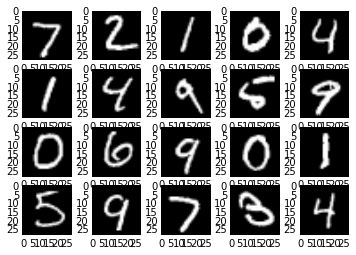

In [17]:
view_digit_images(20, mnist.test.images)

In [18]:
prediction = tf.argmax(y,1)
print sess.run(prediction, feed_dict={x: mnist.test.images[0:20]}) 

[7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4]
